# **COMP561 - Fall 2024  - Homework#2**


# **Question #1 - Population genetics**

In this question, we simulate the evolution of a population of N diploid individuals over several generations. We study how allele frequencies change over time and how this is impacted by selection.

## #1.a) Simulation of the evolution of a population

The objective of the following code is to simulate the evolution of N diploid
individuals with L SNPs. In this simulation, each individual is represented as a pair of binary vectors (0=reference allele, 1=alternate allele), corresponding to the alleles on the maternal and paternal chromosome.

### Input data: initial population

The initial population (founding members) is stored in
the file initial_population.vcf. First, let's read this file, and analyse its content.

In [ ]:
# import the packages needed for the code
import random
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Function that reads the initial population vcf file and return 2 arrays of size (nb SNPs * nb of individuals),
# one storing the maternal SNPs, the other the paternal SNPs of each individual
def read_initial_population(vcf_file):
    # Initialize lists to store maternal and paternal genotypes
    maternal_genotypes = []
    paternal_genotypes = []

    with open(vcf_file, 'r') as file:
        for line in file:
            if line.startswith('#'):
                continue  # Skip header lines
            parts = line.strip().split('\t')  # Split the line into columns

            # Extract genotype information (columns starting from index 6)
            genotypes = parts[6:]
            maternal_row = []
            paternal_row = []

            for genotype in genotypes:
                alleles = genotype.split('|')  # Split genotype into alleles

                # Determine maternal genotype (0 for reference, 1 for alternate)
                maternal_row.append(int(alleles[0]))  # Use the first allele as maternal (0 or 1)

                # Determine paternal genotype (0 for reference, 1 for alternate)
                paternal_row.append(int(alleles[1]))  # Use the second allele as paternal (0 or 1)

            maternal_genotypes.append(maternal_row)  # Add maternal SNP row to the list
            paternal_genotypes.append(paternal_row)  # Add paternal SNP row to the list

    # Convert lists into numpy arrays
    maternal_array = np.array(maternal_genotypes)
    paternal_array = np.array(paternal_genotypes)

    return maternal_array, paternal_array


In [ ]:

# import initial_population
vcf_file = 'initial_population.vcf'
maternal_array, paternal_array = read_initial_population(vcf_file)

# Display the resulting arrays
print("Maternal SNPs Array:")
print(maternal_array)

print("\nPaternal SNPs Array:")
print(paternal_array)

# validate number of alternate alleles for each SNPs
total_alt_alleles = np.sum(maternal_array)+np.sum(paternal_array)
print(total_alt_alleles)
# check that total alternate alleles = 10000, i.e. exactly 1 individual is heterogygous for each SNP in the initial population, all others are homozygous for the reference allele
assert total_alt_alleles== maternal_array.shape[0]

Maternal SNPs Array:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Paternal SNPs Array:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
10000


### step1: Fitness functions

We define 3 different fitness functions, that will be used for answering the different parts of Question 1. Each fitness function takes as input the maternal and paternal genotypes (as matrices : number of SNPs times number of individuals in the population), and returns a vector of size (number of individuals), with the fitness score of each individual.

* **Uniform case:** function **fitness**: in this case, we assume all individuals have the same fitness = 1.

* **Evolutionary advantage:** function **fitness2**: heterozygous confers a fitness of 1.5 (compared to a fitness of 1 for other alleles) and being homozygous for the alternate allele confers a fitness of 2.

* **Deleterious case:** function **fitness3**: heterozygous corresponds to a fitness of 0.9 (compared to a fitness of 1 for other alleles) and being homozygous for the alternate allele corresponds to a fitness of 0.8.

For questions 1 a) to 1e) we use the same fitness for all individuals

In [ ]:

def fitness(maternal, paternal):
  # function that return a fitness score for each individuals
  n = maternal.shape[1]

  return np.ones(n) # All individuals have equal fitness for now


Fitness function for the evolutionary advantage case (question 1.e and 1f)

In [ ]:
#assume that there is one specific SNPs (say SNP42) where being
#heterozygous confers a fitness of 1.5 (compared to a fitness of 1 for other alleles) and
#being homozygous for the alternate allele confers a fitness of 2
def fitness2(maternal, paternal):
    """
    Function that returns a fitness score for each individual based on the genotype at a particular SNP

    Parameters:
    - maternal: 2D numpy array representing the maternal alleles of the population (shape: [L, N])
    - paternal: 2D numpy array representing the paternal alleles of the population (shape: [L, N])

    Returns:
    - fitness_score: 1D numpy array of fitness scores for each individual (size: N)
    """
 # Number of individuals
    n = maternal.shape[1]

    # Initialize fitness scores to 1 for all individuals
    fitness_score = np.ones(n)

    # Loop through each individual to calculate fitness
    for i in range(n):
        # Check if the individual is heterozygous at SNP of interest
        if (maternal[0, i] == 1) or (paternal[0, i] == 1):
            fitness_score[i] = 1.5

        # Check if the individual is homozygous for the alternate allele at SNP of interest
        if (maternal[0, i] == 1) and (paternal[0, i] == 1):
            fitness_score[i] = 2

    # Return the array of fitness scores
    return fitness_score

Fitness function for the deleterious case (question 1g)

In [ ]:
#deleterious case
#heterozygous confers a fitness of 0.9 (compared to a fitness of 1 for other alleles) and
#being homozygous for the alternate allele confers a fitness of 0.8
def fitness3(maternal, paternal):
    """
    Function that returns a fitness score for each individual based on the genotype at a particular SNP

    Parameters:
    - maternal: 2D numpy array representing the maternal alleles of the population (shape: [L, N])
    - paternal: 2D numpy array representing the paternal alleles of the population (shape: [L, N])

    Returns:
    - fitness_score: 1D numpy array of fitness scores for each individual (size: N)
    """
 # Number of individuals
    n = maternal.shape[1]

    # Initialize fitness scores to 1 for all individuals
    fitness_score = np.ones(n)

    # Loop through each individual to calculate fitness
    for i in range(n):
        # Check if the individual is heterozygous at SNP of interest
        if (maternal[0, i] == 1) or (paternal[0, i] == 1):
            fitness_score[i] = 0.9

        # Check if the individual is homozygous for the alternate allele at SNP of interest
        if (maternal[0, i] == 1) and (paternal[0, i] == 1):
            fitness_score[i] = 0.8

    # Return the array of fitness scores
    return fitness_score

### step2 : Parents' selection

In [ ]:
# function that selects 2 parents from a population, based on fitness_scores
# input: fitness scores, a list of fitness scores of each individual of the population
# output : 2 distincts integers (parent1, parent2) corresponding to the indices of the individuals selected as parents in the population
def select_parents(fitness_scores):
  # length of the population:
  n = len(fitness_scores)
  population = np.arange(n)
  # choice of 1st parent:
  total_fitness = sum(fitness_scores)
  #vector storing the probabilities of selection for all individuals of the population, equal to fitness of individual i / total fitness
  probabilities = [f / total_fitness for f in fitness_scores]

  # Select the 1st parent:
  parent1 = random.choices(population, weights=probabilities, k=1)[0]

  # choice of 2nd parent:

  new_fitness = np.delete(fitness_scores, parent1)
  new_population = np.delete(population, parent1)
  total_fitness = sum(new_fitness)
  probabilities = [f / total_fitness for f in new_fitness]
  parent2 = random.choices(new_population, weights=probabilities, k=1)[0]

  return parent1, parent2


### step 3 : Cross_over

In [ ]:
def crossover(parent1, parent2):
    """
    Performs crossover between two parents to produce a child.

    Parameters:
    - parent1: A 2D numpy array representing the first parent (shape: [2, L])
    - parent2: A 2D numpy array representing the second parent (shape: [2, L])

    Returns:
    - child: A 2D numpy array representing the child (shape: [2, L])
    """
    # Number of SNPs
    L = parent1.shape[1]

    # Choose crossover position for maternal chromosome
    k = random.randint(0, L - 1)

    # Choose crossover position for paternal chromosome
    k_prime = random.randint(0, L - 1)

    # Create child maternal chromosome
    child_maternal = np.zeros(L, dtype=int)
    if random.random() < 0.5:
        child_maternal[:k + 1] = parent1[0, :k + 1]  # Take parent1 maternal chromosome from pos 0 to k
        child_maternal[k + 1:] = parent1[1, k + 1:]  # Take parent1 paternal chromosome from k+1  to the end
    else:
        child_maternal[:k + 1] = parent1[1, :k + 1]  # Take parent1 paternal chromosome from pos 0 to k
        child_maternal[k + 1:] = parent1[0, k + 1:]  # Take parent 1 maternal chromosome from pos k+1 to the end

    # Create child paternal chromosome
    child_paternal = np.zeros(L, dtype=int)
    if random.random() < 0.5:
        child_paternal[:k_prime + 1] = parent2[0, :k_prime + 1]  # Take parent2 maternal chromosome from pos 0 to k
        child_paternal[k_prime + 1:] = parent2[1, k_prime + 1:]  # Take parent2 paternal chromosome from pos k+1  to the end
    else:
        child_paternal[:k_prime + 1] = parent2[1, :k_prime + 1]  # Take parent2 paternal chromosome from pos 0 to k
        child_paternal[k_prime + 1:] = parent2[0, k_prime + 1:]  # Take parent2 maternal chromosome from pos k+1  to the end

    # Combine maternal and paternal chromosomes into child
    child = np.array([child_maternal, child_paternal])

    return child



### step 4: Simulate the evolution over 1 generation

In [ ]:
# function that generates the next generation from a given generation (defined by 2 arrays : maternal and paternal SNPs) and its fitness scores
# returns the next generation : 2 arrays giving the maternal and paternal genotypes of the new generation
def generate_next_generation(maternal, paternal, fitness_scores):
  n = maternal.shape[1] # number of individuals in population
  n_snps = maternal.shape[0] # number of SNPs
  new_maternal = np.zeros((n_snps, n), dtype=int)
  new_paternal = np.zeros((n_snps, n), dtype=int)

  for i in range(n):  # For each individual in the population
        #select parents indices
        idx1, idx2 = select_parents(fitness_scores)

        # Get parent chromosomes
        parent1 = np.array([maternal[:, idx1], paternal[:, idx1]])
        parent2 = np.array([maternal[:, idx2], paternal[:, idx2]])

        # Perform crossover to generate the child
        child = crossover(parent1, parent2)

        # Store the child's chromosomes in the new population
        new_maternal[:, i] = child[0]
        new_paternal[:, i] = child[1]

  return new_maternal, new_paternal


### step 5: Simulate the evolution over n generations

In [ ]:
#function that simulates the evolution over n generations and return :
# the final population
# a table giving the alternate allele frequency of each SNP, for each generation (will be usefull to answer questions c to h)
def simulate_generations(maternal, paternal, fitness_function, num_generations):
    n_snps = maternal.shape[0]  # Number of SNPs
    n_individuals = maternal.shape[1]  # Number of individuals

    # Matrix to store alternate allele frequencies over generations
    allele_frequencies = np.zeros((n_snps, num_generations))

    # Simulate each generation
    for gen in range(num_generations):
        # Calculate alternate allele frequency for current generation
        total_alleles = 2 * n_individuals  # Each individual has 2 alleles (maternal + paternal)
        alt_allele_counts = np.sum(maternal + paternal, axis=1)
        allele_frequencies[:,gen] = alt_allele_counts / total_alleles

        # Compute fitness scores for the current generation
        fitness_scores = fitness_function(maternal, paternal)

        # Generate the next generation
        maternal, paternal = generate_next_generation(maternal, paternal, fitness_scores)

    # Calculate alternate allele frequency for the final generation
    alt_allele_counts = np.sum(maternal + paternal, axis=1)
    allele_frequencies[:,-1] = alt_allele_counts / total_alleles

    # Return the final population and the matrix of allele frequencies over generations
    return maternal, paternal, allele_frequencies


In [ ]:
print(maternal_array.shape)

(10000, 100)


## #1 - b) Theoretical probability of extinction after 1 generation

Let's denote L the number of SNPs (L = 10,000) and N the number of individuals in the population (N= 100).

Let's first observe that, since in the initial population only 1 individual is heterozygous for the alternate allele, all others being homozygous for the reference allele, all chidren in generation 1 can be either heterozygous for the alternate allele, or homozygous for the reference allele (homozygous for the alternate allele in generation 1 is not possible since the 2 parents are different, and only 1 can be heterozygous). Therefore, the probability that a child is homozygous for the reference allele is the complementary of the probability $p(het)$ that the child is heterozygous, i.e: $p(\text{hom-ref}) = 1 - p(het)$.


Let's first compute the probability $p(het)$ that a child is heterozygous in generation 1:

There are only 2 situations where a child in generation 1 is heterozygous:

* case 1: parent 1 is heterozygous and parent 2 is homozygous for the reference allele, and the child inherited the chromosome of parent 1 that still had the alternate allele after crossing-over.

* case 2: parent 1 is homozygous for the reference allele and parent 2 is heterozygous, and the child inherited the chromosome of parent 2 that still had the alternate allele after crossing-over.

As these 2 cases form a partition of the ensemble {child is heterozygous}, we can write:
$$p(het) = p(case1) + p(case2)$$

* **Probability of case1**:

We have:

$$p(\text{parent1 is het}) = \frac{1}{N}$$ (probability to select the heterozygous parent among N individuals, when fitness is equal to 1 for everyone)
$$p(\text{parent2 is hom-ref\parent1 is het}) = 1$$ (as there is only 1 het individual in the population and parents must be different)
$$p(\text{child inherits the alt allele from parent1 after crossing-over}) = \frac{1}{2}$$ (with only 1 alternate allele, whatever the crossing over position, only 1 of the 2 resulting strands after crossing over have the alternate allele).  

Noticing that events 'parent1 is het', 'parent2 is hom-ref \parent1 is het' and 'child inherits the alt allele from parent1 after crossing-over' are independent we can write:

$$p(case1) = p((\text{(parent1 is het)}) \text{ and} (\text{parent2 is hom-ref\parent1 is het}) \text{ and} (\text{child inherits the alt allele from parent1 after crossing-over})) $$
$$= p(\text{(parent1 is het)}) \times p(\text{parent2 is hom-ref\parent1 is het}) \times p(\text{child inherits the alt allele from parent1 after crossing-over})$$

and therefore:

$$p(case1) = \frac{1}{N} \times 1 \times \frac{1}{2}  = \frac{1}{2N} $$


* **Probability of case2**:

Similarly:

$$p(\text{parent1 is hom-ref}) = \frac{N-1}{N}$$ (N-1 homozygous individuals in the population of size N, and fitness = 1 for everyone)
$$p(\text{parent2 is het\parent1 is hom-ref}) = \frac{1}{N-1}$$ (probability to select the only heterozygous individual among the remaining N-1 individuals, when fitness = 1 for everyone)

$$p(\text{child inherits the alt allele from parent2 after crossing-over}) =
\frac{1}{2}$$

Therefore:
$$p(case2) = \frac{N-1}{N} \times \frac{1}{N-1} \times \frac{1}{2}  = \frac{1}{2N} $$

and
$$p(het) = p(case1) + p(case2) = \frac{1}{2N} + \frac{1}{2N}  = \frac{1}{N} $$


The probability that a child is homozygous for the reference allele is the complementary of p(het), i.e: $p(\text{hom-ref}) = 1 - p(het) = 1 - \frac{1}{N}$.

The probability of extinction in generation 1 is the probability that all N children are all homozygous for the reference allele. As all birth events are assumed to be independent, the proba of extinction is $p(extinct) = (1 - \frac{1}{N})^N$.

Numerically, with N= 100, $p(extinct) = (1 - \frac{1}{100})^{100} ≈ 0.366$.


##  #1 c) Empirical validation

Simulate the evolution over 1 generation and validate the rate of SNPs extincted from question 1b)

In [ ]:
# generate evolution over 1 generation
m, p, allele_frequencies = simulate_generations(maternal_array, paternal_array, fitness, 1)

In [ ]:
# count allele_frequencies of 0 after 1 generation (extinction)
extinct = np.sum(allele_frequencies[:,0]==0)
# print proportion of extinct SNPs after 1 generation
print(extinct/allele_frequencies.shape[0])

0.3573


Let's validate this probability by running multiple iterations of generation 1 simulation

In [ ]:
#Let's validate this probability by running multiple iterations of generation 1 simulation
niter = 1000
results = np.zeros(niter)
for i in range(niter):
  m, p, allele_frequencies = simulate_generations(maternal_array, paternal_array, fitness, 1)
  extinct = np.sum(allele_frequencies[:,0]==0)
  results[i] = extinct/allele_frequencies.shape[0]

#print average extinction rate over 1000 iterations
print(np.mean(results))


0.3663695


The value obtained by simulation (0.3664) is close to the theoretical value computed is Question 1.b (0.366).

## #1d) Simulation over 20 generations

Simulate over 20 generations and plot the alternate allele frequencies by generation for the first 100 SNPs

In [ ]:
m, p, allele_frequencies = simulate_generations(maternal_array, paternal_array, fitness, 20)

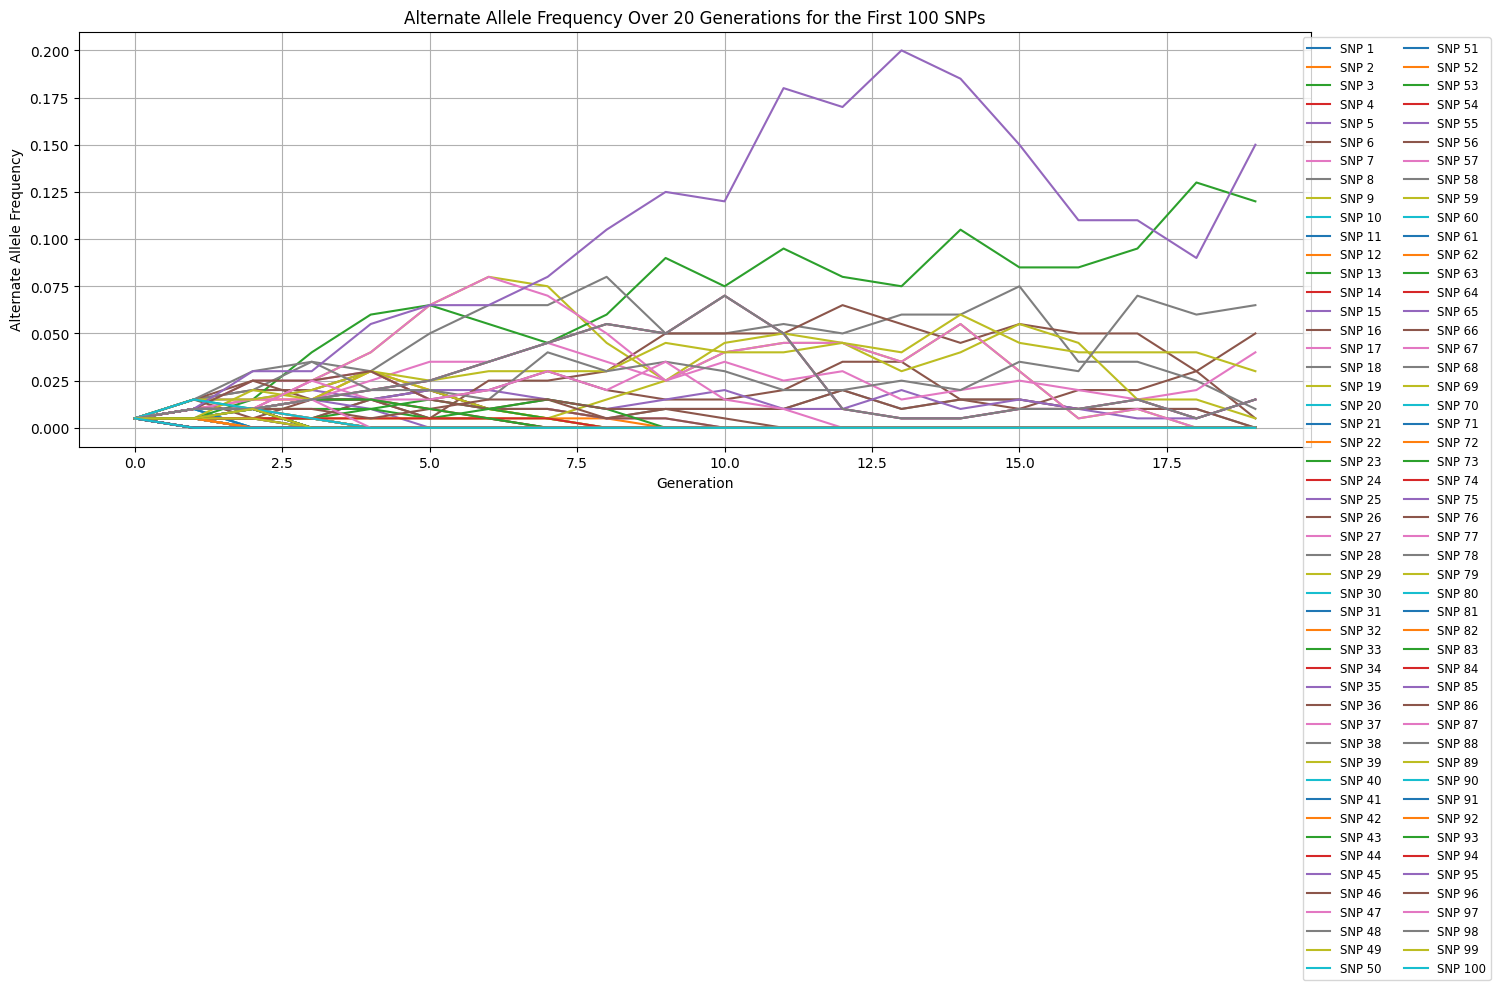

In [ ]:
# plot the alternate allele frequencies for the first 100 SNPs
num_generations = 20
num_snps = 100
plt.figure(figsize=(15, 8))
for snp_idx in range(num_snps):
    plt.plot(range(20), allele_frequencies[snp_idx,:], label=f'SNP {snp_idx + 1}')

plt.xlabel('Generation')
plt.ylabel('Alternate Allele Frequency')
plt.title('Alternate Allele Frequency Over 20 Generations for the First 100 SNPs')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

Over 20 generations, we can see that the alternate allele frequency randomly fluctuates depending on SNPss and each simulation. For some SNPs the alternate allele frequency is as high as 15% after 20 generations, while for others it is 0 (extinction).
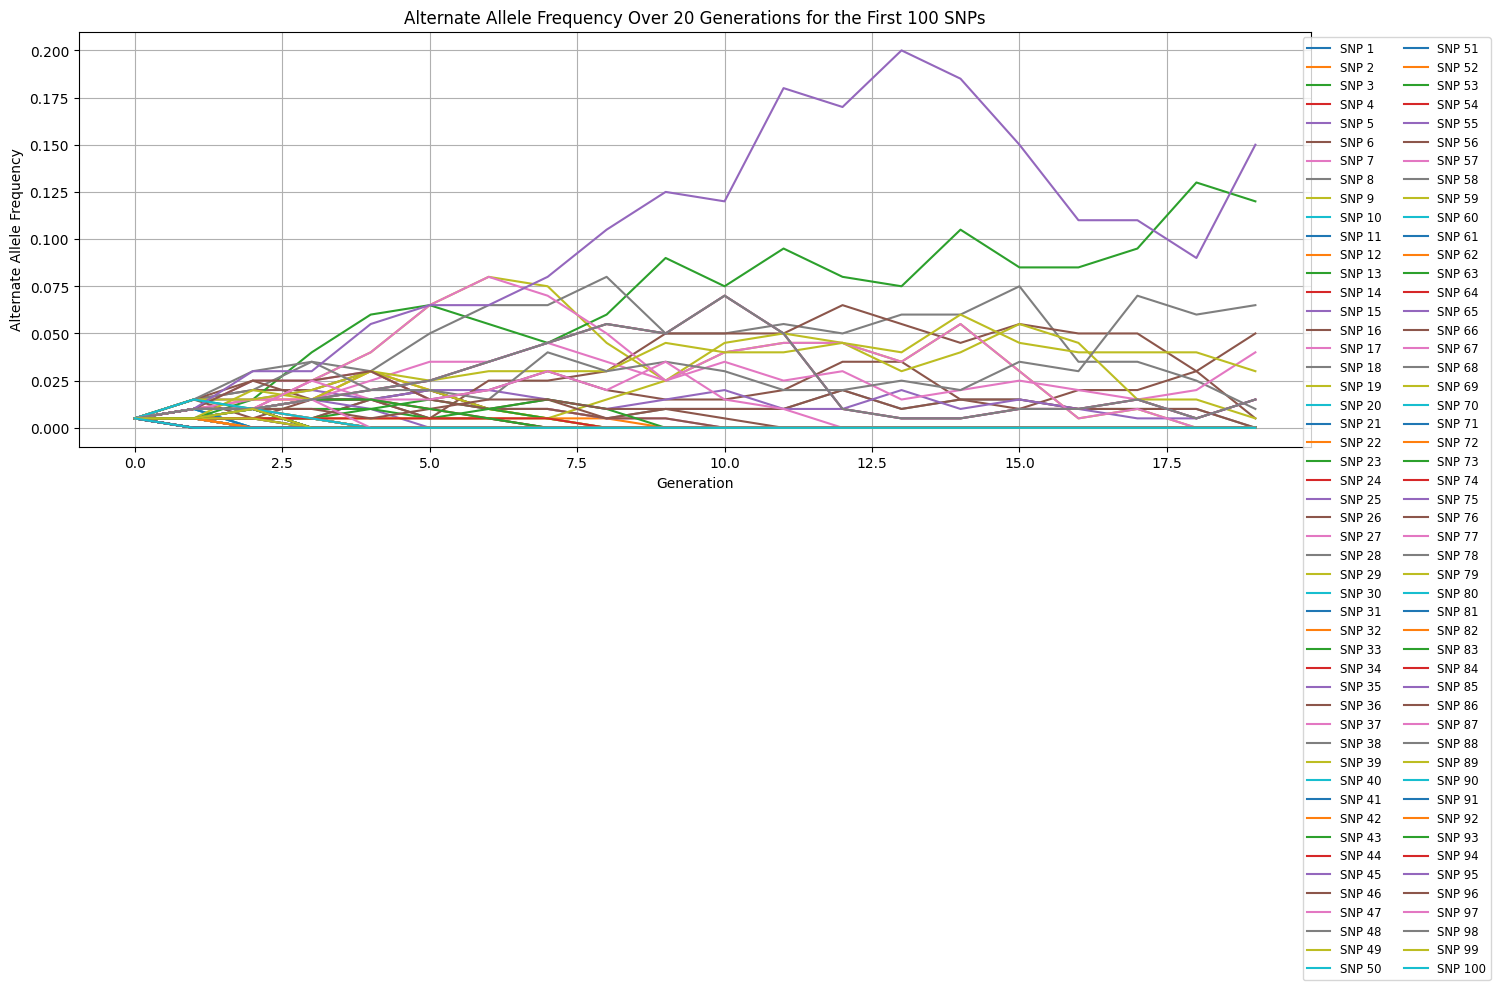

## #1-e) probability of extinction and fixation by generation

In [ ]:
# simulates evolution over 1000 generations
m, p, allele_frequencies = simulate_generations(maternal_array, paternal_array, fitness, 1000)

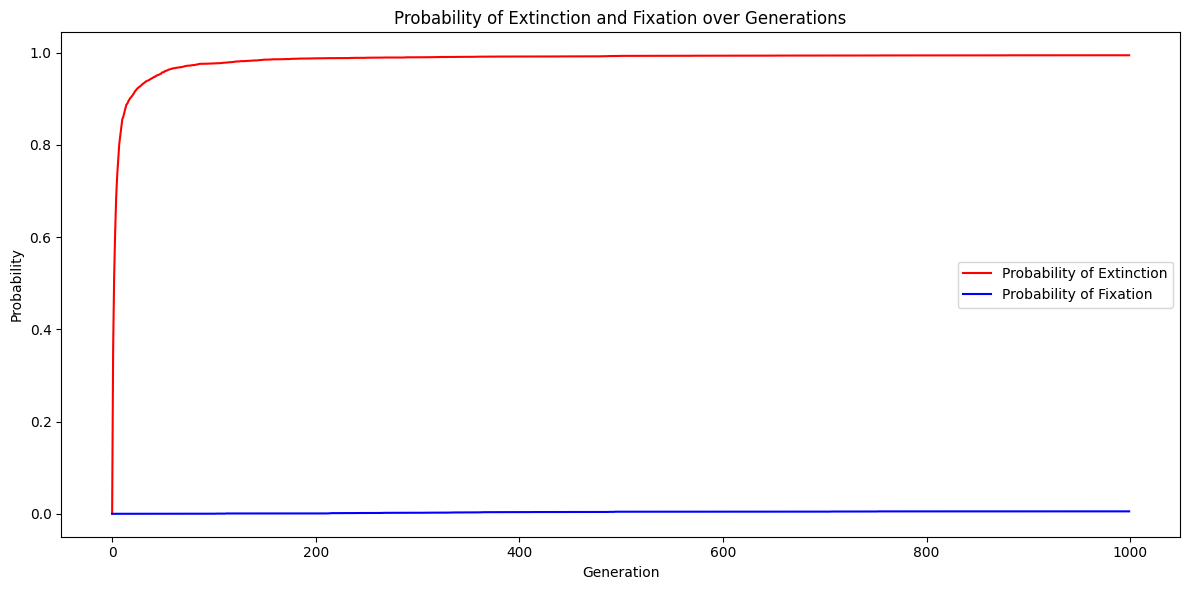

In [ ]:
# Determine where allele frequencies are 0 (extinct) and 1 (fixed)
# and calculate the proportion of SNPs that are extinct or fixed at each generation
extinction_prob = np.mean(allele_frequencies == 0, axis=0)
fixation_prob = np.mean(allele_frequencies == 1, axis=0)

num_generations = 1000


# Plot the probabilities of extinction and fixation over generations
plt.figure(figsize=(12, 6))
plt.plot(range(num_generations), extinction_prob, label='Probability of Extinction', color='red')
plt.plot(range(num_generations), fixation_prob, label='Probability of Fixation', color='blue')
plt.xlabel('Generation')
plt.ylabel('Probability')
plt.title('Probability of Extinction and Fixation over Generations')
plt.legend()
plt.tight_layout()
plt.show()


When being heterozygous does not change the fitness, we can see that the probability of extinction reaches rapidly 1 (after approx. 200 generations), i.e. the probability of fixation reaches 0.

## #1 - f) Probability of extinction after 1 generation when fitness is non uniform

The derivation of the probability of extinction is similar to question 1b, but the probability of selecting parent 1 and parent 2 are modified by the fitness scores.  
We still have:  the probability that a child is homozygous for the reference allele is the complementary of the probability $p(het)$ that the child is heterozygous, i.e: $p(\text{hom-ref}) = 1 - p(het)$.


Let's first compute the probability $p(het)$ that a child is heterozygous in generation 1:

There are still only 2 situations where a child in generation 1 is heterozygous:

* case 1: parent 1 is heterozygous and parent 2 is homozygous for the reference allele, and the child inherited the chromosome of parent 1 that still had the alternate allele after crossing-over.

* case 2: parent 1 is homozygous for the reference allele and parent 2 is heterozygous, and the child inherited the chromosome of parent 2 that still had the alternate allele after crossing-over.

As these 2 cases form a partition of the ensemble {child is heterozygous}, we can write:
$$p(het) = p(case1) + p(case2)$$

* **Probability of case1**:

We have:

$$p(\text{parent1 is het}) =  \frac{1.5}{N + 1.5}$$
$$p(\text{parent2 is hom-ref} \mid \text{parent1 is het}) = 1$$ (as there is only 1 het individual in the initial population and parents must be different)
$$p(\text{child inherits the alt. allele from parent1 after crossing-over}) = \frac{1}{2}$$

Noticing that events 'parent1 is het', 'parent2 is hom\parent1 is het' and 'child inherits the alt allele from parent1 after crossing-over' are independent we can write:

$$p(case1) = p((\text{(parent1 is het)}) \text{ and} (\text{parent2 is hom-ref\parent1 is het}) \text{ and} (\text{child inherits the alt allele from parent1 after crossing-over})) $$
$$= p(\text{(parent1 is het)}) \times p(\text{parent2 is hom-ref\parent1 is het}) \times p(\text{child inherits the alt allele from parent1 after crossing-over})$$

and therefore:

$$p(case1) = \frac{1.5}{N+1.5} \times 1 \times \frac{1}{2}  = \frac{1.5}{2N+1} $$


* **Probability of case2**:

Similarly:

$$p(\text{parent1 is hom}) = \frac{N-1}{N+0.5}$$
$$p(\text{parent2 is het\parent1 is hom-ref}) = \frac{1.5}{N-0.5}$$

$$p(\text{child inherits the alt allele from parent2 after crossing-over}) =
\frac{1}{2}$$

Therefore:
$$p(case2) = \frac{N-1}{N+0.5} \times \frac{1.5}{N-0.5} \times \frac{1}{2}  = \frac{1.5(N-1)}{2(N+0.5)(N-0.5)} $$

and
$$p(het) = p(case1) + p(case2) = \frac{1.5}{2N+1} + \frac{1.5(N-1)}{2(N+0.5)(N-0.5)}  $$
$$ = \frac{1.5}{2N+1} \left( 1 + \frac{N-1}{N-0.5} \right) $$
$$ = \frac{1.5}{2N+1} \left( \frac{2N-1.5}{N-0.5} \right) $$
$$ = \frac{3N - 2.25}{(2N^2-0.5)} $$

The probability that a child is homozygous for the reference allele is the complementary of p(het), i.e: $p(hom) = 1 - p(het) = 1 - \frac{3N -2.25}{2N^2-0.5}$.

The probability of extinction in generation 1 is the probability that all N children are all homozygous for the reference allele. As all birth events are supposed independent, the proba of extinction is $p(extinct) = (1 - \frac{3N -2.25}{2N^2-0.5})^N$.

Numerically, with N= 100, $p(extinct)  ≈ 0.2231$.

As expected, the probability of extinction is lower (0.223 versus 0.366) when being heterozygous confers a better fitness score (i.e evolutionary advantage).

In [ ]:
# simulate the next generation 1000 times for SNP42
niter= 1000
results = np.zeros((niter,1))
# import initial_population
vcf_file = 'initial_population.vcf'
maternal_array, paternal_array = read_initial_population(vcf_file)
#select only SNP 42
m0 = np.expand_dims(maternal_array[41,:], axis=0)
p0 = np.expand_dims(paternal_array[41,:], axis=0)
# run the next generation algo multiple times (niter) and save alternate allele frequencies in results array
for i in range(niter):
  if i % 100 == 0:
    print(i)
  m, p, allele_frequencies = simulate_generations(m0, p0, fitness2, 1)
  results[i] = allele_frequencies[0]
#print average extinction proba over 100 tests
print('Estimated extinction probability at generation 1 : ')
print(np.mean(results==0))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
0.2222


The resulting estimated extinction probability after 1 generation (0.2222) is close to the theoretical one derived in this question (0.2231)

## #1.g) probability of extinction after 100 generations

In [ ]:
# simulate the evolution over 100 generations, 1000 times for SNP42
gen = 100
iter = 1000
results = np.zeros((iter,1))
# import initial_population
vcf_file = 'initial_population.vcf'
maternal_array, paternal_array = read_initial_population(vcf_file)
#select only SNP 42:
m0 = np.expand_dims(maternal_array[41,:], axis=0)
p0 = np.expand_dims(paternal_array[41,:], axis=0)

#Simulate evolution over 100 generations repeatedly (iter times)
for i in range(iter):
  if i % 100 == 0:
    print(f"Iteration {i}")
    print(np.mean(results[:i,0]==0))
  m, p, allele_frequencies = simulate_generations(m0, p0, fitness2, 100)
  results[i,0] = allele_frequencies[0,-1]

#print average extinction proba over 1000 iterations
print('Estimated extinction probability after 100 generations: ')
print(np.mean(results==0))

Iteration 0
nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteration 100
0.38
Iteration 200
0.42
Iteration 300
0.42
Iteration 400
0.43
Iteration 500
0.428
Iteration 600
0.43666666666666665
Iteration 700
0.4342857142857143
Iteration 800
0.4425
Iteration 900
0.4488888888888889
0.447


The probability of extinction after 100 generations, estimated based on 1000 simulations, is 0.447. It is significantly lower than in the case of equal fitness (close to 1 after 100 generations, as shown in question 1-e)).  

## #1 h) deleterious case

In [ ]:
# simulate the evolution over 100 generations, 1000 times for a deleterious SNP42
gen = 100
iter = 1000
results = np.zeros((iter,1))
# import initial_population
vcf_file = 'initial_population.vcf'
maternal_array, paternal_array = read_initial_population(vcf_file)
#select only SNP 42
m0 = np.expand_dims(maternal_array[41,:], axis=0)
p0 = np.expand_dims(paternal_array[41,:], axis=0)

#Simulate evolution over 100 generations repeatedly (iter times)
for i in range(iter):
  if i % 10 == 0:
    print(f"Iteration {i}")
    print(np.mean(results[:i,0]==0))
  m, p, allele_frequencies = simulate_generations(m0, p0, fitness3, gen)
  results[i,0] = allele_frequencies[0,-1]

#print average extinction proba over 1000 iterations
print('Estimated extinction probability after 100 generations: ')
print(np.mean(results==0))


Iteration 0
nan
Iteration 10
1.0
Iteration 20
1.0
Iteration 30
1.0
Iteration 40
1.0
Iteration 50
1.0
Iteration 60
1.0
Iteration 70
1.0
Iteration 80
1.0
Iteration 90
1.0
Iteration 100
1.0
Iteration 110
1.0
Iteration 120
1.0
Iteration 130
1.0
Iteration 140
1.0
Iteration 150
1.0
Iteration 160
1.0
Iteration 170
1.0
Iteration 180
1.0
Iteration 190
1.0
Iteration 200
1.0
Iteration 210
1.0
Iteration 220
1.0
Iteration 230
1.0
Iteration 240
1.0
Iteration 250
1.0
Iteration 260
1.0
Iteration 270
1.0
Iteration 280
1.0
Iteration 290
1.0
Iteration 300
1.0
Iteration 310
1.0
Iteration 320
1.0
Iteration 330
1.0
Iteration 340
1.0
Iteration 350
1.0
Iteration 360
1.0
Iteration 370
1.0
Iteration 380
1.0
Iteration 390
1.0
Iteration 400
1.0
Iteration 410
1.0
Iteration 420
1.0
Iteration 430
1.0
Iteration 440
1.0
Iteration 450
1.0
Iteration 460
1.0
Iteration 470
1.0
Iteration 480
1.0
Iteration 490
1.0
Iteration 500
1.0
Iteration 510
1.0
Iteration 520
1.0
Iteration 530
1.0
Iteration 540
1.0
Iteration 550
1.0
Ite

When being heterozygous is deleterious for the individual (lower fitness score), the probability of extinction after 100 generations is 1.  and the convergence is much quicker than for the neutral case.  

# #QUESTION 2 - Genome-wide association studies#


In this question we perform a small genome-wide association study on simulated data.

Input data:

  
*   file gwas_population.vcf : contains the genotypes of 1000 individuals at 10,000 SNPs

*   file gwas_phenotypes.txt describes which of those 1000 individuals have disease D (a value of 1 indicates that the individual has the disease).


## #2.a) p-values

We first read the 2 input files and compute, for each SNP, the p-value of the association between the SNP’s genotype and the disease D, using a standard chi-squared test.

In [ ]:
from scipy.stats import chi2_contingency

### step1: read the phenotypes file

In [ ]:
# Function that read the vcf file containing the phenotypes and save them in an array
def read_phenotypes(filename):
    phenotypes = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split('\t')  # Split each line by tab
            phenotypes.append(int(parts[1]))  # Store the phenotype value (second column)
    return np.array(phenotypes)  # Return as numpy array for efficient operations


### step2: read the genotypes file

In [ ]:
# Function that reads the vcf file containing the genomes and save them in an array
def read_vcf(filename):
    snp_data = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('#'):
                continue  # Skip header lines
            parts = line.strip().split('\t')
            # Extract genotype data starting from 7th column (VCF data format)
            genotypes = []
            for genotype in parts[6:]:
                alleles = genotype.split('|')  # Split by the '|' character to get the two alleles
                alleles = [int(allele) for allele in alleles]  # Convert alleles to integers
                genotypes.append(sum(alleles))  # Sum the two alleles for diploid representation
            snp_data.append(genotypes)
    return np.array(snp_data, dtype=object)  # Return as numpy array



### step 3: chi-square test

In [ ]:
# perform chi_square test for 1 SNPs
def chi_squared_test(snp_genotypes, phenotypes):
  # phenotypes is a n*1 array (n= size of the population tested)
  # snp_genotypes is also a n* 1 array, representing the genotype of these n individuals for a given SNP
  # (values 0: homozygous reference allele; 1: heterozygous; 2: homozygous alternate allele)

  # Construct a contingency table
  n = len(phenotypes)
  contingency_table = np.zeros((2, 3))  # Two rows: Disease (1) and No Disease (0), Three columns: Genotype counts
  for i in range(n):
        disease_status = phenotypes[i] # 0 : healthy 1: disease
        genotype = snp_genotypes[i]
        contingency_table[disease_status, genotype] += 1
  #replace empty columns with very small values 10^-10
  contingency_table = np.where(contingency_table == 0, 1e-10, contingency_table)
  #print(contingency_table)
  # Perform chi-squared test
  res = chi2_contingency(contingency_table)

  return res, contingency_table


### step4: compute p-values

In [ ]:
def calculate_p_values(genotype_data, phenotypes):
    p_values = []
    for i in range(genotype_data.shape[0]):  # Iterate over each SNP
        snp_genotypes = genotype_data[i, :]
        #print(i)
        res, _ = chi_squared_test(snp_genotypes, phenotypes)
        p_values.append(res.pvalue)
    return p_values


In [ ]:
    # File paths
vcf_file = 'gwas_population.vcf'
phenotype_file = 'gwas_phenotypes.txt'

    # Read data
phenotypes = read_phenotypes(phenotype_file)
genotype_data = read_vcf(vcf_file)
print(genotype_data.shape, phenotypes.shape)



(10000, 1000) (1000,)


In [ ]:
# Calculate p-values for each SNP
p_values = calculate_p_values(genotype_data, phenotypes)


## #2.b) significant p-values

In [ ]:
# SNPs with p-values < 0.05
threshold = 0.05
selected_p_values = np.array([(i, p) for i, p in enumerate(p_values) if p < threshold])

# Print selected p-values and their row numbers
#print("Selected p-values and their row numbers:")
#print(selected_p_values)
print("Number of selected SNPs:", len(selected_p_values))

Number of selected SNPs: 454


There are 454 SNPs with a p-value < 0.05.

Just by chance, over m = 10,000 SNPs tested, the expected number of SNPs with a p-value lower than 0.05 is $0.05 \times 10000 = 500$.

In order to avoid false discoveries, we need to adjust the threshold to take into account the number of SNPs tested, using for example the Bonferroni correction.   

## #2.c) Bonferroni correction

To take into account the large number of SNPs tested, we apply Bonferroni correction to the threshold : instead of using a significance threshold $\alpha = 0.05$, we divide it by the number of SNPs tested, i.e. 10,000. Equivalently, we can keep the threshold unchanged at 0.05, but compute a corrected p-value equal the uncorrected p-value times the number of SNPs tested.

Let's identify the SNPs with a corrected p-value lower than 0.05.

In [ ]:
# SNPs with corrected p-values < 0.05
threshold = 0.05/10000
selected_p_values = np.array([(i, p) for i, p in enumerate(p_values) if p < threshold])

# Print selected p-values and their row numbers
print("Selected p-values and their row numbers:")
print(selected_p_values)
print("Number of selected SNPs:", len(selected_p_values))

Selected p-values and their row numbers:
[[1.00000000e+03 1.73248204e-16]
 [2.00000000e+03 9.23011898e-07]
 [3.00000000e+03 5.62921271e-10]
 [4.00000000e+03 4.77037177e-07]]
Number of selected SNPs: 4


Let's compute the odd ratios for heterozygous and homozygous for the alternate allele.

In [ ]:

def odds_ratios(contingency_table):
    #Odds_ratio(het) = Pr [Disease | individual is het] / Pr [Disease | individual is homo-ref]
    #Odds_ratio(homo-alt) = Pr [Disease | individual is homo-alt] / Pr [Disease | individual is homo-ref]

    # Pr [Disease | individual is het]
    p_dhet = contingency_table[1,1]/(contingency_table[1,1]+ contingency_table[0,1])  # ratio of cases (Heterozygous and disease) / total cases Heterozygous
    # Pr [Disease | individual is homo-ref]
    p_dref = contingency_table[1,0]/(contingency_table[1,0]+ contingency_table[0,0])  # ratio of cases (Homozygous ref. allele and disease) / total cases Homozygous ref. allele
    #odds_ratio_het
    odds_ratio_het = p_dhet / p_dref

    # Pr [Disease | individual is homo-alt]
    p_dalt = contingency_table[1,2]/(contingency_table[1,2]+ contingency_table[0,2])  # ratio of cases (Homzygous for the alt. allele and disease) / total cases Homzygous for the alt. allele
    #odds_ratio_alt
    odds_ratio_homo_alt = p_dalt / p_dref

    return odds_ratio_het, odds_ratio_homo_alt


In [ ]:
# compute the different statistics for the selected SNPs
m = 10000
N = len(selected_p_values)
#table of results, showing SNP #, p-value, corrected p-value and odd ratios
results = np.zeros((N, 5))

for i in range(N):
  snp_idx = int(selected_p_values[i,0])
  res, contingency_table = chi_squared_test(genotype_data[snp_idx,:], phenotypes)
  odds_ratio_het, odds_ratio_homo_alt = odds_ratios(contingency_table)
  results[i,0] = snp_idx
  results[i,1] = res.pvalue
  results[i,2] = res.pvalue * m
  results[i,3] = odds_ratio_het
  results[i,4] = odds_ratio_homo_alt

# pretty print the results
print("SNP Index\tp-value\t\tCorrected p-value\tOdds Ratio (Het)\tOdds Ratio (Homo-Alt)")
for row in results:
    print(f"{int(row[0])}\t\t{row[1]:.5e}\t{row[2]:.5e}\t\t{row[3]:.2f}\t\t\t{row[4]:.2f}")

SNP Index	p-value		Corrected p-value	Odds Ratio (Het)	Odds Ratio (Homo-Alt)
1000		1.73248e-16	1.73248e-12		1.58			2.51
2000		9.23012e-07	9.23012e-03		1.50			2.25
3000		5.62921e-10	5.62921e-06		1.59			2.03
4000		4.77037e-07	4.77037e-03		1.34			2.00


## #2.d) Interpretation

The disease odd ratios for individuals who are
heterozygous are all quite similar for the 4 SNPs, ranging between 1.34 and 1.59. Similarly, the disease odds ratios for individuals who are
homozygous for the alternate allele are also quite similar for the 4 SNPs, ranging between 2.0 and 2.51. However the corrected p-values are very different for the 4 SNPs: for instance 1.7 10^-12 for SNP #1000, but 5.6 10^-6 for SNP#3000 (more than 10^6 higher !)  and still 1000 times higher for SNPs #2000 and #4000.

These differences can be explained by the differences in alternate allele frequencies for the different SNPs selected: for rare alternate alleles (low frequency in the tested population), there are fewer observations available. This can result in less reliable estimates and larger p-values due to higher variability. For more common alternate alleles (higher frequency in the tested population) estimates are more stable, and can result in smaller p-values.

Let's display the contingency tables for each of the 4 SNPs selected:

In [ ]:
# Print the contingency tables for the first 4 selected SNPs
for i in range(4):
    snp_idx = int(selected_p_values[i, 0])  # Get the SNP index
    res, contingency_table = chi_squared_test(genotype_data[snp_idx, :], phenotypes)

    # Calculate totals for each genotype
    totals = contingency_table.sum(axis=0)

    # Print the tables adding headers and totals for clarity
    print(f"SNP {snp_idx}")
    print("Genotype\tHomo_ref\tHeterozygous\tHomo_alt")
    print(f"Healthy   \t{contingency_table[0, 0]}\t\t{contingency_table[0, 1]}\t\t{contingency_table[0, 2]}")
    print(f"Disease    \t{contingency_table[1, 0]}\t\t{contingency_table[1, 1]}\t\t{contingency_table[1, 2]}")
    print(f"Total     \t{totals[0]}\t\t{totals[1]}\t\t{totals[2]}")
    print("-" * 60)



SNP 1000
Genotype	Homo_ref	Heterozygous	Homo_alt
Healthy   	265.0		283.0		52.0
Disease    	95.0		203.0		102.0
Total     	360.0		486.0		154.0
------------------------------------------------------------
SNP 2000
Genotype	Homo_ref	Heterozygous	Homo_alt
Healthy   	521.0		77.0		2.0
Disease    	298.0		93.0		9.0
Total     	819.0		170.0		11.0
------------------------------------------------------------
SNP 3000
Genotype	Homo_ref	Heterozygous	Homo_alt
Healthy   	257.0		273.0		70.0
Disease    	98.0		213.0		89.0
Total     	355.0		486.0		159.0
------------------------------------------------------------
SNP 4000
Genotype	Homo_ref	Heterozygous	Homo_alt
Healthy   	408.0		178.0		14.0
Disease    	215.0		154.0		31.0
Total     	623.0		332.0		45.0
------------------------------------------------------------


For instance, we can see that the frequency of alternate allele is much lower for SNP2000 than for SNP1000 (18.1% for SNP2000 versus 64% for SNP 1000) which seems to explain well the difference in p-values (p-value is much lower for SNP 2000 (around $10^{-3}$)compared to SNP1000 (around $10^{-12})), with relatively similar odd ratios.  